# Machine Learning Algorithms - (3) Logistic Regression

<div style="border: 1px solid #007acc; background-color: #e6f4ff; padding: 10px; border-radius: 5px; color: black;">
  <strong>📘 Info:</strong> I do not claim ownership of the content in this notebook. It is based on different tutorials and resources. Parts of the code or text may have been copy-pasted or adapted directly from those or other sources for learning purposes.
</div>

In [1]:
import warnings
warnings.filterwarnings('ignore', category=DeprecationWarning)
warnings.filterwarnings('ignore', category=FutureWarning)

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm

from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

## 1. What is Logistic Regression?

Logistic Regression is a supervised learning algorithm used for **binary classification** tasks. Despite the name, it's actually a classification algorithm, not a regression one.

Unlike Linear Regression which predicts continuous values, Logistic Regression predicts probabilities. To map predicted values to a [0, 1] range, we use the sigmoid function:

$\sigma(z) = \frac{1}{1 + e^{-z}}$

Where:
- $z = \theta^T x = \theta_0 + \theta_1 x_1 + \dots + \theta_n x_n$
- $\sigma(z)$ is the predicted probability of the positive class.

We interpret the output of the sigmoid as the probability that $y = 1$, given input features $x$:

$P(y=1|x) = \sigma(\theta^T x)$

$$
\hat{y} =
\begin{cases}
1 & \text{if } \sigma(z) \geq 0.5 \\
0 & \text{otherwise}
\end{cases}
$$

## 2. The Loss Function: Binary Cross Entropy

To measure how well our predictions match the true labels, we use a loss function called binary cross-entropy (also known as log loss).

For each training example $i$, let:
- $y^{(i)} \in \{0, 1\}$ be the true label,
- $\hat{y}^{(i)} = \sigma(z^{(i)}) \in (0, 1)$ be the predicted probability.

The binary cross-entropy loss for one sample is:

$$
\mathcal{L}^{(i)} = - \left[ y^{(i)} \log(\hat{y}^{(i)}) + (1 - y^{(i)}) \log(1 - \hat{y}^{(i)}) \right]
$$

This loss penalizes wrong confident predictions more than less confident ones:
- If $y = 1$, we want $\hat{y} \to 1$, so $\log(\hat{y})$ is maximized.
- If $y = 0$, we want $\hat{y} \to 0$, so $\log(1 - \hat{y})$ is maximized.

For the whole dataset of $m$ examples, the cost function is:

$$
J(\theta) = \frac{1}{m} \sum_{i=1}^m \mathcal{L}^{(i)} =
- \frac{1}{m} \sum_{i=1}^m \left[ y^{(i)} \log(\hat{y}^{(i)}) + (1 - y^{(i)}) \log(1 - \hat{y}^{(i)}) \right]
$$

The goal of training is to minimize this loss by adjusting $\theta$ so that predictions get closer to true labels.

## 3. Generating a Dataset

In [3]:
X, y = make_classification(
    n_samples=500, n_features=2, n_redundant=0,
    n_informative=2, random_state=42, n_clusters_per_class=1
)
scaler = StandardScaler()
X = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## 4. Implementing Logistic Regression

In [4]:
class LogisticRegression:
    def __init__(self, learning_rate=0.01, n_epochs=1000):
        self.learning_rate = learning_rate
        self.n_epochs = n_epochs
        self.theta = None
        self.bias = None

    def _sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def _compute_loss(self, y, y_hat):
        # Add small epsilon to avoid log(0)
        epsilon = 1e-8
        return -np.mean(y * np.log(y_hat + epsilon) + (1 - y) * np.log(1 - y_hat + epsilon))

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.theta = np.zeros(n_features)
        self.bias = 0

        for _ in tqdm(range(self.n_epochs), desc="Training"):
            linear_output = np.dot(X, self.theta) + self.bias
            y_hat = self._sigmoid(linear_output)

            # Compute gradients
            error = y_hat - y
            d_theta = (1 / n_samples) * np.dot(X.T, error)
            d_bias = (1 / n_samples) * np.sum(error)

            # Gradient descent step
            self.theta -= self.learning_rate * d_theta
            self.bias -= self.learning_rate * d_bias

    def predict_proba(self, X):
        linear_output = np.dot(X, self.theta) + self.bias
        return self._sigmoid(linear_output)

    def predict(self, X, threshold=0.5):
        probabilities = self.predict_proba(X)
        return (probabilities >= threshold).astype(int)

Training: 100%|██████████| 1000/1000 [00:00<00:00, 85673.22it/s]


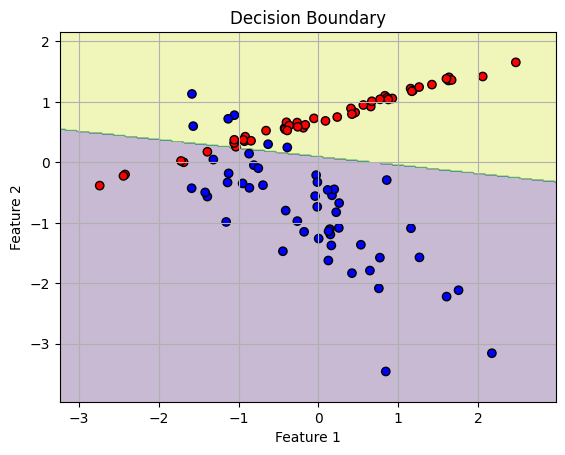

In [5]:
model = LogisticRegression(learning_rate=0.1, n_epochs=1000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

def plot_decision_boundary(X, y, model):
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 300),
                         np.linspace(y_min, y_max, 300))
    grid = np.c_[xx.ravel(), yy.ravel()]
    preds = model.predict(grid).reshape(xx.shape)

    plt.contourf(xx, yy, preds, alpha=0.3)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', cmap='bwr')
    plt.title("Decision Boundary")
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.grid(True)
    plt.show()

plot_decision_boundary(X_test, y_test, model)

## 6. Model Evaluation

In [6]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {accuracy:.2f}")

Test Accuracy: 0.88


## 7. Summary and Takeaways

- Logistic Regression outputs probabilities using the sigmoid function.
- It is trained using gradient descent and binary cross-entropy loss.
- It's simple yet powerful for linear decision boundaries.
- It forms the basis of more complex models like neural networks.